> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Load the Dataset

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Investigate the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

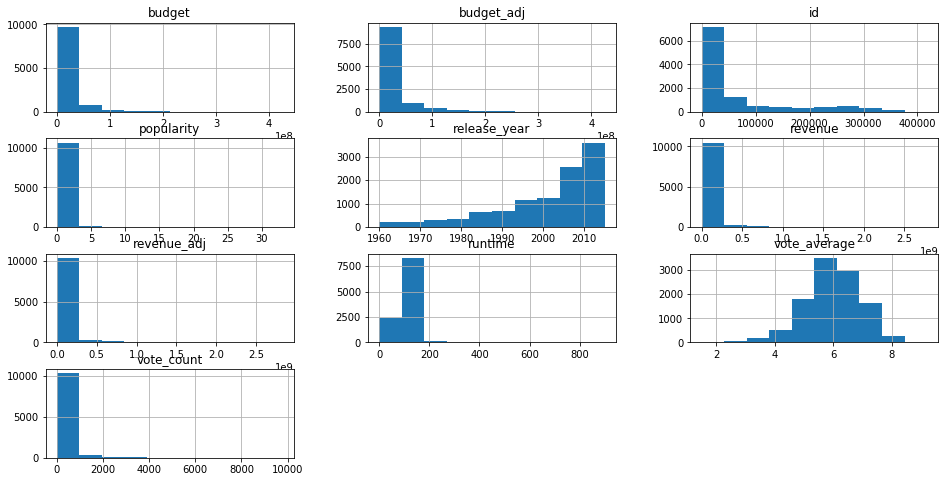

In [5]:
df.hist(figsize=(16,8));

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
df.duplicated().sum()

1

- Issues
    - one duplicate
    - `id` should be string
    - `release_date` should be datetime

#### `release_year` column

In [8]:
#Search for categorical variables
df['release_year'].value_counts().sort_values(ascending=False).head(15)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
Name: release_year, dtype: int64

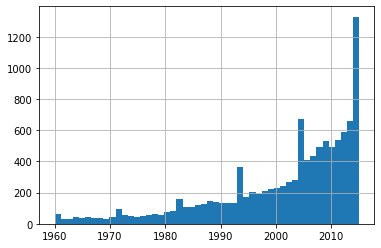

In [9]:
df['release_year'].hist(bins=50);

#### `director` column

In [10]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Tim Burton           19
Wes Craven           19
David Cronenberg     18
Mike Nichols         18
John Carpenter       18
Name: director, dtype: int64

#### `original_title` column

In [11]:
df['original_title'].value_counts().head(15)

Hamlet                  4
Jane Eyre               3
Hercules                3
Oliver Twist            3
A Christmas Carol       3
Alice in Wonderland     3
The Three Musketeers    3
Emma                    3
Shelter                 3
Frankenstein            3
Annie                   3
The Black Hole          3
Beauty and the Beast    3
Julia                   3
Life                    3
Name: original_title, dtype: int64

It's not strange that there are many repeated titles, because famous movies are re-acted but let's check!

In [12]:
df[df['original_title'] == 'Hamlet']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


In [13]:
df[df['original_title'] == 'Carrie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4101,7342,tt0319970,0.257263,0,0,Carrie,Angela Bettis|Patricia Clarkson|Rena Sofer|Kan...,NaN,David Carson,NaN,...,Carrie White is a lonely and painfully shy tee...,132,Drama|Horror,MGM Television|Trilogy Entertainment Group,11/4/02,53,5.5,2002,0.000000e+00,0.000000e+00
5486,133805,tt1939659,1.412233,30000000,82394288,Carrie,ChloÃ« Grace Moretz|Julianne Moore|Judy Greer|...,http://www.carrie-movie.com,Kimberly Peirce,Know her name. Fear her power.,...,A reimagining of the classic horror tale about...,100,Drama|Horror,Screen Gems|Metro-Goldwyn-Mayer (MGM)|Misher F...,10/16/13,897,5.8,2013,2.808100e+07,7.712380e+07
10175,7340,tt0074285,1.263483,1800000,33800000,Carrie,Sissy Spacek|Piper Laurie|Amy Irving|William K...,NaN,Brian De Palma,If youâ€™ve got a taste for terror... take Car...,...,"Carrie may be ostracized, but the shy teen has...",98,Horror|Thriller,United Artists,11/3/76,497,6.8,1976,6.897056e+06,1.295114e+08


In [14]:
df[df['original_title'] == 'Annie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
724,196867,tt1823664,1.588010,65000000,133821816,Annie,QuvenzhanÃ© Wallis|Jamie Foxx|Rose Byrne|Camer...,NaN,Will Gluck,It's a Hard Knock Life,...,"Ever since her parents left her as a baby, lit...",119,Music|Comedy|Drama|Family,Columbia Pictures|Sony Pictures Entertainment ...,12/19/14,331,6.1,2014,5.987092e+07,1.232621e+08
2485,26177,tt0207972,0.548720,0,0,Annie,Kathy Bates|Victor Garber|Alan Cumming|Audra M...,NaN,Rob Marshall,Disney makes the classical musical more magica...,...,Eleven-year-old Annie has been living in an or...,90,Music|Family|Comedy,Walt Disney Television|Storyline Entertainment...,11/7/99,35,5.5,1999,0.000000e+00,0.000000e+00
8920,15739,tt0083564,0.421748,50000000,57059003,Annie,Aileen Quinn|Albert Finney|Carol Burnett|Ann R...,NaN,John Huston,The movie of 'Tomorrow',...,An orphan in a facility run by the mean Miss H...,127,Comedy|Drama|Family|Music,Columbia Pictures|Rastar Pictures,6/18/82,99,6.2,1982,1.129821e+08,1.289329e+08


Cool, they're not duplicates. No worries here.

#### `homepage` column

In [15]:
df['homepage'].isnull().sum()

7930

In [16]:
df['homepage'].sample(10)

9649                             NaN
10443                            NaN
1976     http://www.leapyearfilm.net
10818                            NaN
10733                            NaN
2825                             NaN
9226                             NaN
9037                             NaN
2841                             NaN
9896                             NaN
Name: homepage, dtype: object

Looks like the column `homepage` won't be of much use, since it's has many nans

#### `tagline` column

In [17]:
# Can't really imagine what tagline column might be like
df['tagline'].sample(10)

5502                     Danger is real, fear is a choice
6893                                                  NaN
6459                                                  NaN
6571                       Come to Kazakhstan, it's nice!
7125    18 women want children. Jack is a white collar...
5592                   He Will Bring Out The Devil In You
3860                      You can't be what you can't see
528                                                   NaN
3127                      Keep the faith. Steal the rest.
159     It takes a cop from the future to fight an ene...
Name: tagline, dtype: object

In [18]:
df['tagline'].isnull().sum()

2824

#### `keywords` column

In [19]:
df['keywords'].sample(10)

1714                     independent film|writer|hometown
2115               jealousy|cooking|garden|funeral|season
6495    street gang|street war|internal affairs|los an...
7363    war crimes|writing|mythology|australian|south ...
2059         number in title|digit in title|sea turtle|3d
5010             trauma|psychopath|stalker|friends|murder
1445    toronto|lesbian|remake of french film|suspicio...
2516    alien|martian|based on tv series|fish out of w...
9873    atomic bomb|nuclear radiation|post-apocalyptic...
1794    arranged marriage|failure|near future|woman di...
Name: keywords, dtype: object

In [20]:
df['keywords'].value_counts().head(15)

woman director                     134
independent film                    82
sport                               25
musical                             24
suspense                            24
duringcreditsstinger                24
holiday                             16
stand-up|stand up comedy            16
biography                           15
independent film|woman director     13
stand up comedy                      9
christmas                            7
holiday|christmas                    7
dystopia                             7
found footage                        7
Name: keywords, dtype: int64

In [21]:
df['keywords'].isnull().sum()

1493

#### `overview` column

In [22]:
df['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                    13
1960. The thrilling battles waged by a band of kids from two rival villages in the southern French countryside.                                                                                                                                                                                                                                                        2
In the year of 2039, after World Wars destroy much of the civilization as we know it, territories are no longer run by governments, but by corporations; the mightiest of which is the Mishima Zaibatsu. In order to placate the seething masses of this dystopia, Mishima sponsors Te

In [23]:
useless_overviews = sum(df['overview'].isnull()) + sum(df['overview'] == 'No overview found.')
useless_overviews

17

#### `production_companies` column

In [24]:
df['production_companies'].value_counts().head(25)

Paramount Pictures                              156
Universal Pictures                              133
Warner Bros.                                     84
Walt Disney Pictures                             76
Columbia Pictures                                72
Metro-Goldwyn-Mayer (MGM)                        72
New Line Cinema                                  61
Touchstone Pictures                              51
20th Century Fox                                 50
Twentieth Century Fox Film Corporation           49
TriStar Pictures                                 45
Orion Pictures                                   42
Miramax Films                                    32
Columbia Pictures Corporation                    31
DreamWorks Animation                             31
Pixar Animation Studios                          30
Walt Disney Productions                          29
Dimension Films                                  28
United Artists                                   23
Imagine Ente

#### `release_date` column

In [25]:
df['release_date'].sample(10)

7872       1/1/79
5665      4/20/13
1023      3/21/14
4936     11/23/12
2320      8/12/10
7502      9/20/07
2837       8/3/01
6961      9/22/06
10018     8/10/90
10429    10/30/67
Name: release_date, dtype: object

#### `vote_count` column

In [26]:
df['vote_count'].sample(10)

839     393
1613    108
3816     17
2985    197
2479    196
5284     12
9759    456
9900     11
5537    242
512      27
Name: vote_count, dtype: int64

In [27]:
#to get a sense of the numbers
df['vote_count'].describe()

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

#### `popularity` column

In [28]:
#to get a sense of the numbers
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [29]:
df['popularity'].min()

6.500000000000001e-05

In [30]:
df[df['popularity'] == df['popularity'].min()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.0


Runtime is 561 mins which is wierd!!

#### `runtime` column

In [31]:
sum(df['runtime'] >= 180)

145

Apparantly, there's something wrong

In [32]:
df[df['runtime'] >= 180].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10443,8095,tt0056937,0.804533,31115000,57750000,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,NaN,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,...,Historical epic. The triumphs and tragedy of t...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,6/12/63,68,6.3,1963,2.215444e+08,4.111904e+08
7164,30698,tt0400435,0.290518,0,0,The Five People You Meet In Heaven,Jon Voight|Ellen Burstyn|Jeff Daniels|Dagmara ...,NaN,Lloyd Kramer,NaN,...,"On his 83rd birthday, Eddie (Voight), a war ve...",180,Drama|Fantasy|Science Fiction,NaN,12/5/04,15,6.7,2004,0.000000e+00,0.000000e+00
1678,61872,tt1461312,0.342084,0,0,Alice,Caterina Scorsone|Kathy Bates|Andrew-Lee Potts...,NaN,Nick Willing,Welcome to a whole new Wonderland.,...,The story takes place in Wonderland 150 years ...,240,Fantasy|Drama|Science Fiction,NaN,12/6/09,32,6.0,2009,0.000000e+00,0.000000e+00
3708,76115,tt2077886,0.295301,0,0,The Phantom of the Opera at the Royal Albert Hall,Ramin Karimloo|Sierra Boggess|Hadley Fraser|Ki...,NaN,Nick Morris|Laurence Connor,Be Seduced,...,"A disfigured musical genius, hidden away in th...",202,Drama|Music|Romance,THE REALLY USEFUL THEATRE COMPANY PRODUCTION|C...,9/27/11,15,7.6,2011,0.000000e+00,0.000000e+00
2598,5319,tt0150992,0.161076,0,0,Hum Dil De Chuke Sanam,Aishwarya Rai Bachchan|Salman Khan|Ajay Devgn|...,NaN,Sanjay Leela Bhansali,NaN,...,Indian-based traditional family of Pundit Darb...,188,Drama|Romance,Bhansali Films,6/18/99,16,6.6,1999,0.000000e+00,0.000000e+00


The dataset has movies and series/miniseries which is considered a tidiness issue

#### `genres` column

In [33]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

#### `budget` & `budget_adj` columns

In [34]:
#to get a sense of the range of values in the budget column
df['budget'].describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [35]:
#because it doesn't make sense to have a budget of zero
df[df['budget'] == 0].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7459,13649,tt0810900,0.996329,0,7000000,High School Musical 2,Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas...,http://www.disneychannel.com/highschoolmusical2,Kenny Ortega,NaN,...,The East High Wildcats are ready to have the t...,104,Comedy|Drama|Family|Music,Disney Channel,8/17/07,448,6.0,2007,0.0,7.361680e+06
8963,49483,tt0084438,0.051755,0,0,Oliver Twist,George C. Scott|Tim Curry|Michael Hordern|Timo...,NaN,Clive Donner,A Compelling New Version of the Great Victoria...,...,The classic Dickens tale of an orphan boy who ...,103,TV Movie|Crime|Drama,Norman Rosemont Productions|Claridge Productio...,3/23/82,15,6.0,1982,0.0,0.000000e+00
5333,11210,tt0117496,0.419759,0,0,Robinson Crusoe,Pierce Brosnan|James Frain|Polly Walker|Ian Ha...,NaN,Rod Hardy|George T. Miller,NaN,...,Robinson Crusoe flees Britain on a ship after ...,92,Action|Adventure|Drama,Miramax,6/11/97,17,5.0,1997,0.0,0.000000e+00


In [36]:
# let's check if we can fix them by using the 2010 dollar values
df['budget_adj'].min()

0.0

In [37]:
df['budget_adj'].describe()

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

#### `revenue` & `revenue_adj` columns

In [38]:
# to get a sense of the range of values in revenue
df['revenue'].describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [39]:
sum(df['revenue'] == 0)

6016

In [40]:
sum(df['revenue'] != 0)

4850

In [41]:
# to get a sense of the range of values in revenue
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [42]:
df[df['revenue'] == df['revenue'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5652,215962,tt2573858,0.517151,600000,0,The Stag,Andrew Scott|Hugh O'Conor|Peter McDonald|Brian...,NaN,John Butler,Mistakes were made,...,"At his fiancÃ©eâ€™s urging, a very modern Iris...",94,Comedy,Treasure Entertainment,9/10/13,25,5.0,2013,561620.011644,0.0
5185,13778,tt0325258,0.169652,0,0,Dickie Roberts: Former Child Star,David Spade|Mary McCormack|Craig Bierko|Scott ...,NaN,Sam Weisman,50 million people used to watch him on TV. Now...,...,"TV child star of the '70s, Dickie Roberts is n...",98,Comedy,Paramount Pictures|Happy Madison Productions,9/5/03,27,5.4,2003,0.000000,0.0
5960,218460,tt2274172,0.134357,0,0,The Contractor,Danny Trejo|Christina Cox|Brad Rowe|Taylor Spr...,NaN,Sean Olson,NaN,...,Elizabeth Chase is busy remodeling her new hom...,87,Crime|Drama|Thriller,Hybrid,9/2/13,10,2.4,2013,0.000000,0.0


In [43]:
df[df['revenue_adj'] == df['revenue_adj'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10789,34193,tt0077889,0.076600,0,0,Magic,Anthony Hopkins|Ann-Margret|Burgess Meredith|E...,NaN,Richard Attenborough,A terrifying love story.,...,A ventriloquist is at the mercy of his vicious...,107,Drama|Horror|Thriller,Twentieth Century Fox Film Corporation|Joseph ...,11/8/78,13,6.7,1978,0.000000e+00,0.0
1906,19238,tt1238304,0.169317,0,0,Table for Three,Jesse Bradford|Sophia Bush|Brandon Routh|Jenni...,NaN,Michael Samonek,Never trust a perfect couple.,...,A suddenly single guy invites what he thinks i...,93,Comedy|Romance,Starz Media,1/1/09,12,4.3,2009,0.000000e+00,0.0
8589,11229,tt0116361,0.361648,3000000,0,Freeway,Kiefer Sutherland|Reese Witherspoon|Wolfgang B...,NaN,Matthew Bright,Her life is no fairy tale.,...,"Following the arrest of her mother, Ramona, yo...",110,Comedy|Drama|Thriller,The Kushner-Locke Company|August Entertainment...,8/23/96,30,6.6,1996,4.170650e+06,0.0


#### `vote_average` column

In [44]:
# to get a sense of the vote average
df['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [45]:
df['vote_average'].value_counts().head(15)

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
6.3    461
6.5    457
6.4    446
5.7    415
6.6    413
5.6    412
5.5    380
6.7    376
5.3    358
5.4    338
Name: vote_average, dtype: int64

This means that `vote_average` ranges from 1 to 10.

Issues that need to be cleaned:
- Filling the empty string values with "empty"
- one duplicate
- `id` should be string
- `release_date` should be datetime
- Remove the series and miniseries into a separate table
- Columns to be dropped(because we won't use them):<br>
    - imdb_id
    - budget_adj
    - revenue_adj
    - overview
    - tagline

To sum up the questions that need to be answered
- which genres are most popular every year?
- which directors are the most popular in the 70s, 60s, 90s, and 2000s?
- which movies are the most popular in the 70s, 60s, 90s, and 2000s?
- How does the movie budgets change every year?
- Does the movie budget affect its popularity?
- Does the movie runtime affect its popularity?
- Is there a relation between production companies and the movie's popularity?
- Does certain genres get high budget than others?
- Does certain directors generate bigger revenue?
<br><br>
- high revenue movies vs (genre, budget, director, runtime, production company)
- popularity vs (genre, director, budget, runtime, production company)
- title vs (popularity, vote average, homepage, genre, director, production company)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [46]:
# Make a copy of the clean data
movies = df.copy()

#### Filling the empty string values

In [47]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [48]:
movies.fillna("empty", inplace=True)

In [49]:
movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Removing the duplicate

In [50]:
movies.drop_duplicates(inplace=True)

In [51]:
# Just to check
movies.duplicated().sum()

0

#### Fixing the `id` column

In [52]:
movies['id'].dtype

dtype('int64')

In [53]:
movies['id'] = movies['id'].astype(str)

In [54]:
# To check
movies['id'].dtype

dtype('O')

#### Fixing the `release_date` column

In [55]:
movies['release_date'].dtype

dtype('O')

In [56]:
movies['release_date'].sample()

720    2/13/14
Name: release_date, dtype: object

The given order is month/day/year. We can take the year from the `release_year` column

In [57]:
# Removing the last 2 characters (which indicate the year) and adding the year from the release_year column
movies['release_date'] = movies['release_date'].map(lambda x: x[:-2])
movies['release_date'] = movies['release_date'] + movies['release_year'].astype(str)

In [58]:
movies['release_date'].sample()

2708    11/6/2001
Name: release_date, dtype: object

In [59]:
# Changing the type into datetime
pd.to_datetime(movies['release_date'], format='%m/%d/%Y')

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

#### Drop the unnecessary columns

In [60]:
to_be_dropped_columns = ['imdb_id', 'budget_adj', 'revenue_adj', 'overview', 'tagline']
movies.drop(to_be_dropped_columns, axis=1, inplace=True)
# Just to check
movies.shape

(10865, 16)

#### Splitting the table into 2 tables

In [ ]:
movies.shape

In [ ]:
series = pd.DataFrame(movies[movies['runtime'] > 180 ])

In [ ]:
series.shape

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Genres Analysis

In [ ]:
top_genres = movies.genres.value_counts().sort_values(ascending=False).head(7)
top_genres

In [ ]:
plt.bar(top_genres.keys(), top_genres)
plt.xticks(rotation=45, fontsize=8)
plt.show();

In [ ]:
top_genres_by_years = movies['release_year'].query('genres == "Comedy"').value_counts().sort_values(ascending=False).head(7)
top_genres_by_years

### Revenue Analysis

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Directors & Production Companies Analysis

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!